## Problem Statement

HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities. It runs a lot of operational projects from time to time along with advocacy drives to raise awareness as well as for funding purposes.

 

After the recent funding programmes, they have been able to raise around $ 10 million. Now the CEO of the NGO needs to decide how to use this money strategically and effectively. The significant issues that come while making this decision are mostly related to choosing the countries that are in the direst need of aid.


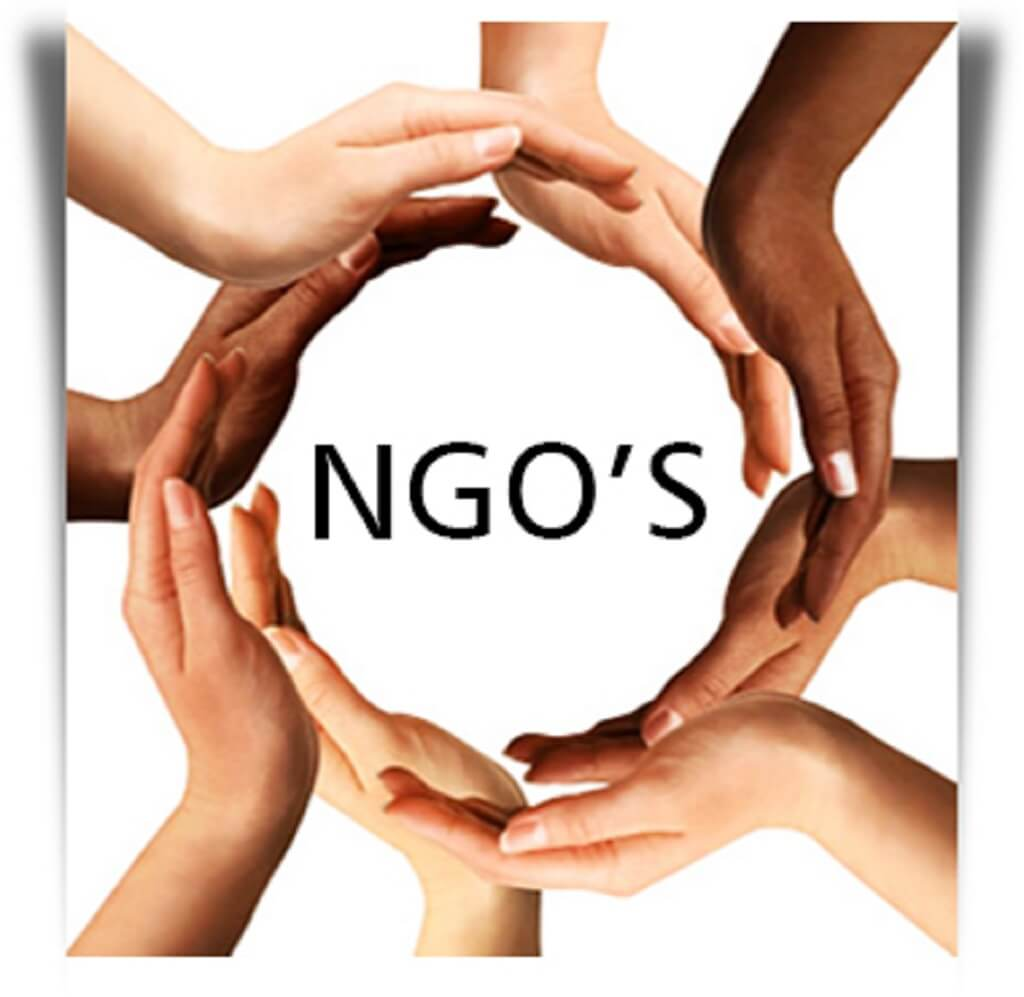

## Business Goal

Our job is to categorise the countries using some socio-economic and health factors that determine the overall development of the country. Then you need to suggest the countries which the CEO needs to focus on the most.

In [1]:
# import all libraries and dependencies for dataframe

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from datetime import datetime, timedelta

# import all libraries and dependencies for data visualization
pd.options.display.float_format='{:.4f}'.format
plt.rcParams['figure.figsize'] = [8,8]
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', -1) 
sns.set(style='darkgrid')
import matplotlib.ticker as plticker
%matplotlib inline

# import all libraries and dependencies for machine learning
from sklearn.preprocessing import StandardScaler

from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
from math import isnan

# import all libraries and dependencies for clustering
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

## Step 1: Reading and Understanding the Data

In [2]:
# Reading the country file on which analysis needs to be done

country = pd.read_csv('Country-data.csv')

country.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2000,10.0000,7.5800,44.9000,1610,9.4400,56.2000,5.8200,553
1,Albania,16.6000,28.0000,6.5500,48.6000,9930,4.4900,76.3000,1.6500,4090
2,Algeria,27.3000,38.4000,4.1700,31.4000,12900,16.1000,76.5000,2.8900,4460
3,Angola,119.0000,62.3000,2.8500,42.9000,5900,22.4000,60.1000,6.1600,3530
4,Antigua and Barbuda,10.3000,45.5000,6.0300,58.9000,19100,1.4400,76.8000,2.1300,12200


In [3]:
# Reading the data dictionary file

data_dict = pd.read_csv('data-dictionary+.csv')
data_dict.head(10)

,Column Name,Description
0,country,Name of the country
1,child_mort,Death of children under 5 years of age per 1000 live births
2,exports,Exports of goods and services per capita. Given as %age of the GDP per capita
3,health,Total health spending per capita. Given as %age of GDP per capita
4,imports,Imports of goods and services per capita. Given as %age of the GDP per capita
5,Income,Net income per person
6,Inflation,The measurement of the annual growth rate of the Total GDP
7,life_expec,The average number of years a new born child would live if the current mortality patterns are to remain the same
8,total_fer,The number of children that would be born to each woman if the current age-fertility rates remain the same.
9,gdpp,The GDP per capita. Calculated as the Total GDP divided by the total population.


In [4]:
country.shape

(167, 10)

In [5]:
country.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.0000,167.0000,167.0000,167.0000,167.0000,167.0000,167.0000,167.0000,167.0000
mean,38.2701,41.1090,6.8157,46.8902,17144.6886,7.7818,70.5557,2.9480,12964.1557
std,40.3289,27.4120,2.7468,24.2096,19278.0677,10.5707,8.8932,1.5138,18328.7048
min,2.6000,0.1090,1.8100,0.0659,609.0000,-4.2100,32.1000,1.1500,231.0000
25%,8.2500,23.8000,4.9200,30.2000,3355.0000,1.8100,65.3000,1.7950,1330.0000
50%,19.3000,35.0000,6.3200,43.3000,9960.0000,5.3900,73.1000,2.4100,4660.0000
75%,62.1000,51.3500,8.6000,58.7500,22800.0000,10.7500,76.8000,3.8800,14050.0000
max,208.0000,200.0000,17.9000,174.0000,125000.0000,104.0000,82.8000,7.4900,105000.0000


In [6]:
country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.1+ KB


<a id="2"></a> <br>
## Step 2 : Data Cleansing

We need to do some basic cleansing check in order to feed our model the correct data.

In [7]:
# Calculating the Missing Values % contribution in DF

country.isna().mean()*100

country      0.0000
child_mort   0.0000
exports      0.0000
health       0.0000
imports      0.0000
income       0.0000
inflation    0.0000
life_expec   0.0000
total_fer    0.0000
gdpp         0.0000
dtype: float64

#### Inference:
- None of the columns have null values hence no imputation or drop required.

In [8]:
# Datatype check for the dataframe

country.dtypes

country       object 
child_mort    float64
exports       float64
health        float64
imports       float64
income        int64  
inflation     float64
life_expec    float64
total_fer     float64
gdpp          int64  
dtype: object

#### Inference:
- None of the columns have inconsistent datatype, hence no conversion is required.

*The dataset seems to be almost clean and hence no such cleansing activities are required.*

<a id="3"></a> <br>
## Step 3 : Data Visualization

####  Countries with highest child_mortality  

In [9]:
top_child_mort= pd.DataFrame(country.groupby(['country'])['child_mort'].mean().sort_values(ascending = False)).head(10)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

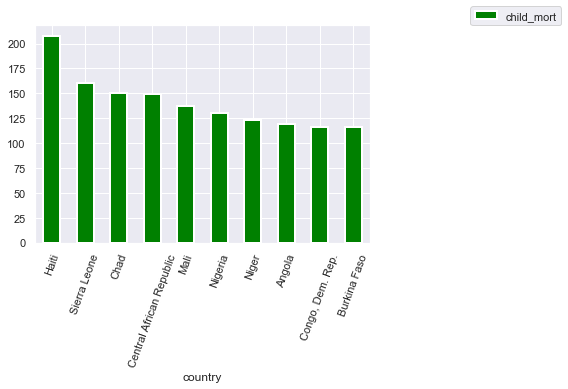

In [10]:
top_child_mort.plot(kind='bar',color='green',linewidth=2)
plt.legend(loc=(1.3,1))
plt.xticks(rotation = 70)

#### Relationship between Health vs child mortality of a country  

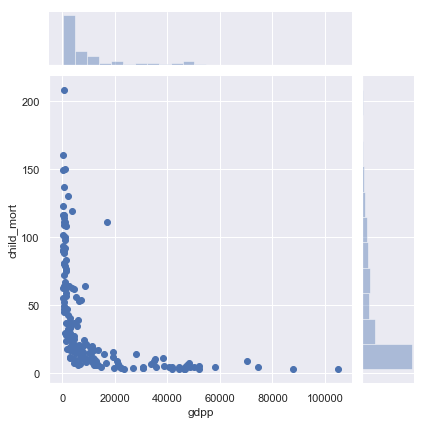

In [11]:
sns.jointplot(x = 'gdpp', y = 'child_mort', data = country)

**Inference** :

As the gdpp increases , child mortality rate decreases .

####  Countries with highest gdpp  

In [12]:
top_gdpp= pd.DataFrame(country.groupby(['country'])['gdpp'].mean().sort_values(ascending = False)).head(10)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

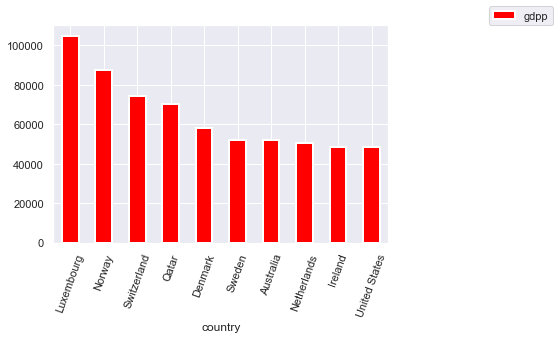

In [13]:
top_gdpp.plot(kind='bar',color='red',linewidth=2)
plt.legend(loc=(1.3,1))
plt.xticks(rotation = 70)

#### Relationship between Income vs Life expectency in a country

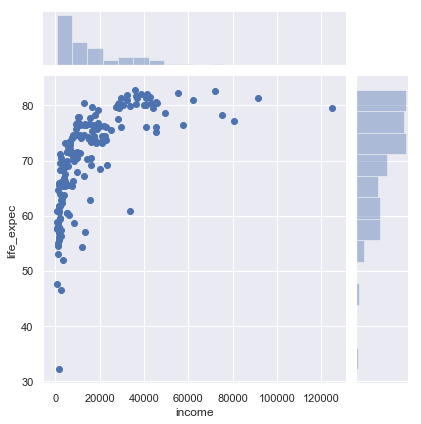

In [14]:
sns.jointplot(x = 'income', y = 'life_expec', data = country)

**Inference** : 

As the income increases , life expentency rate increase for a country .

#### Relationship btw gdpp and health across various countries 

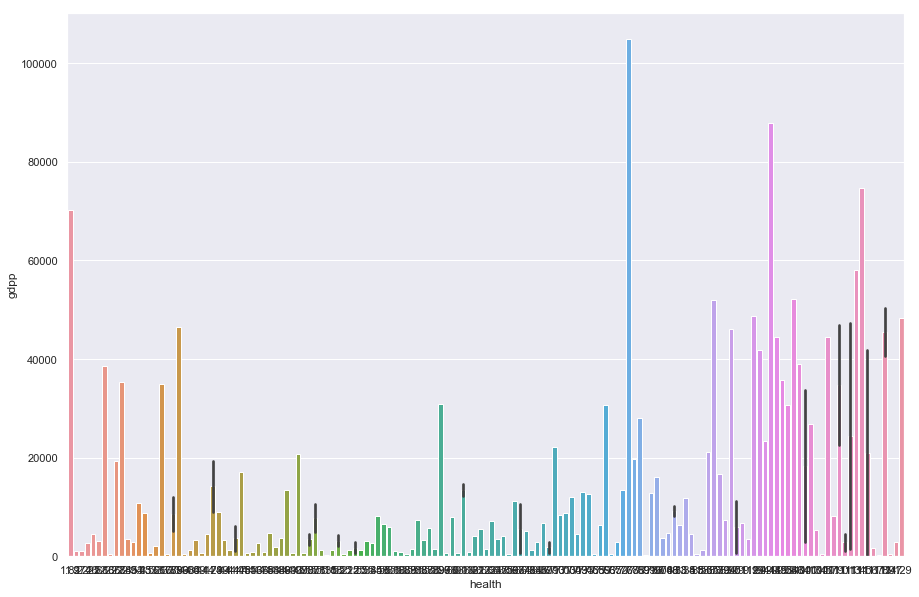

In [15]:
plt.figure(figsize = (15,10))  
sns.barplot(x='health', y='gdpp', data=country) 


**Inference** :

We can observe that as the gdpp increases the health improves for the country 

 #### Pairplot of all socio-economic features 

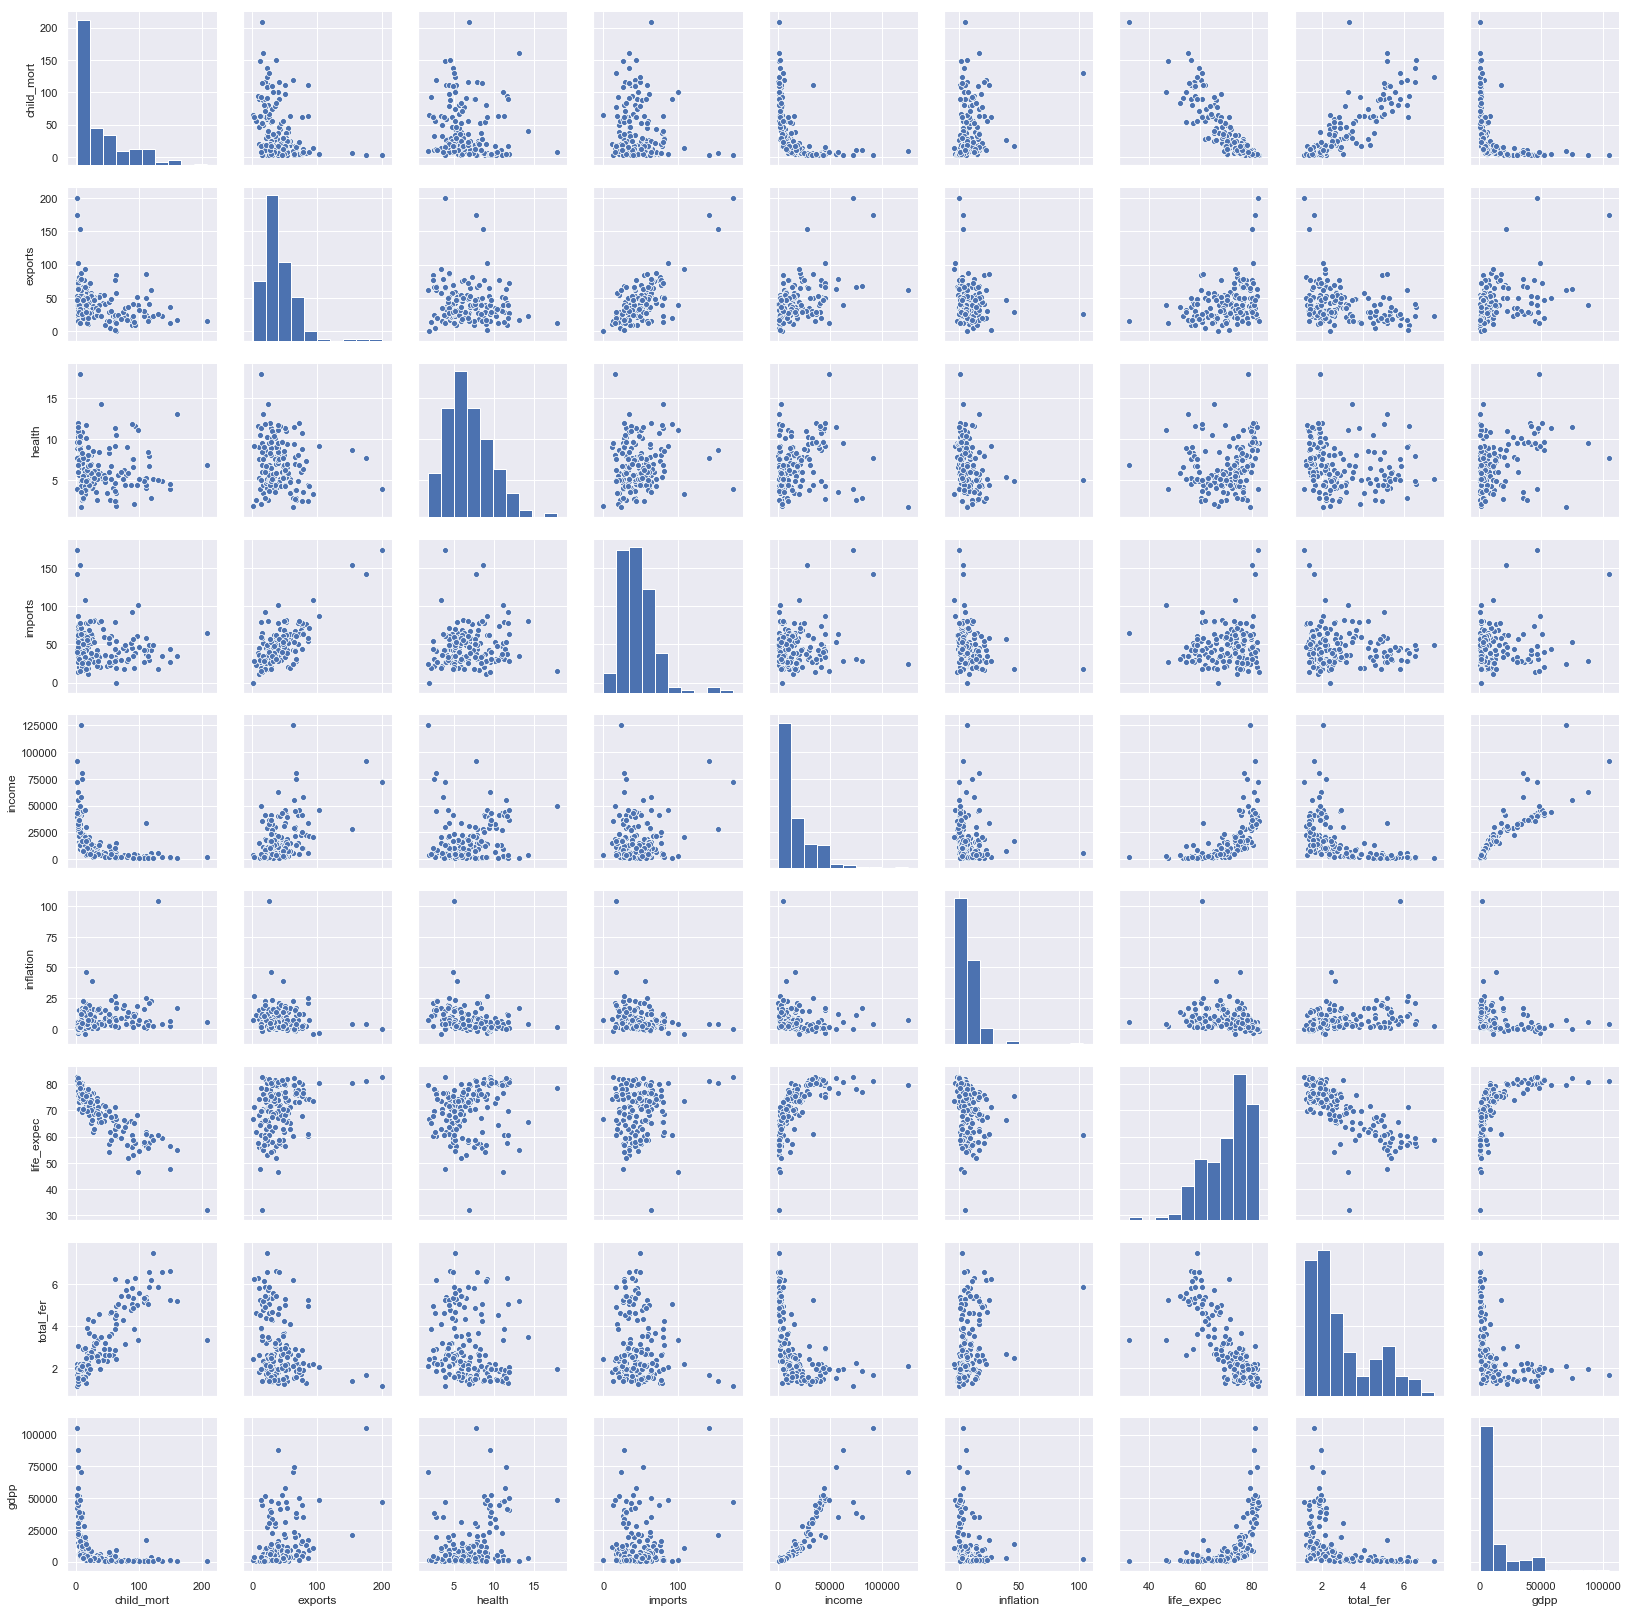

In [16]:
# Pairplot of all numeric columns

sns.pairplot(country)

(9.5, -0.5)

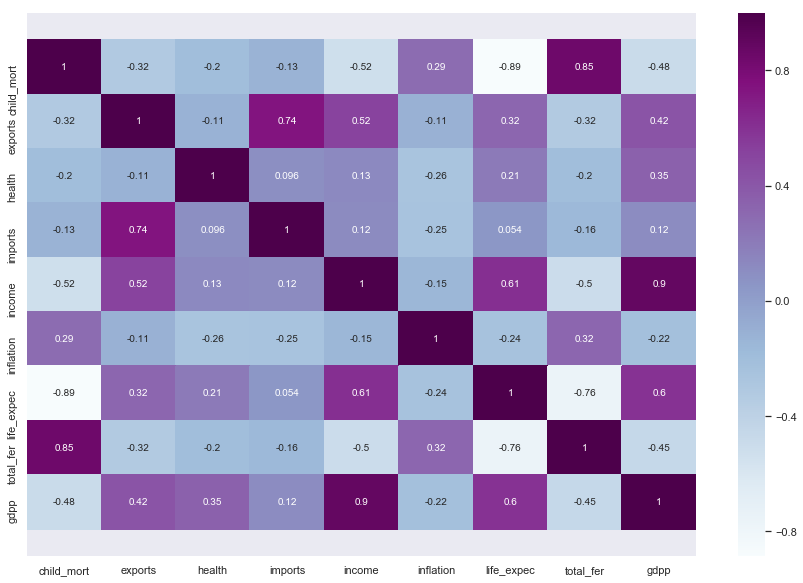

In [17]:
# Heatmap to understand the attributes dependency

plt.figure(figsize = (15,10))        
ax = sns.heatmap(country.corr(),annot = True,cmap="BuPu")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

#### Inference:
- child_mortality and Health are highly correlated with correlation of 0.92
- life expectency and total_fertility are highly correlated with correlation of -0.88
- imports and exports are highly correlated with correlation of 0.99
- Income and gdpp are highly correlated with correlation of 0.91


<a id="4"></a> <br>
## Step 4 : Data Preparation

**Derived Metrices**

Deducing imports,exports and health spending from percentage values to actual values of their GDP per capita 

In [18]:
# Converting exports,imports and health spending percentages to absolute values.

country['exports'] = country['exports'] * country['gdpp']/100
country['imports'] = country['imports'] * country['gdpp']/100
country['health'] = country['health'] * country['gdpp']/100

In [19]:
country.head(5)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2000,55.3000,41.9174,248.2970,1610,9.4400,56.2000,5.8200,553
1,Albania,16.6000,1145.2000,267.8950,1987.7400,9930,4.4900,76.3000,1.6500,4090
2,Algeria,27.3000,1712.6400,185.9820,1400.4400,12900,16.1000,76.5000,2.8900,4460
3,Angola,119.0000,2199.1900,100.6050,1514.3700,5900,22.4000,60.1000,6.1600,3530
4,Antigua and Barbuda,10.3000,5551.0000,735.6600,7185.8000,19100,1.4400,76.8000,2.1300,12200


### Outlier Analysis 


In [20]:
#Dropping country col from the dataframe

countries = country.copy()
countries.pop('country')
countries.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.0000,167.0000,167.0000,167.0000,167.0000,167.0000,167.0000,167.0000,167.0000
mean,38.2701,7420.6188,1056.7332,6588.3521,17144.6886,7.7818,70.5557,2.9480,12964.1557
std,40.3289,17973.8858,1801.4089,14710.8104,19278.0677,10.5707,8.8932,1.5138,18328.7048
min,2.6000,1.0769,12.8212,0.6511,609.0000,-4.2100,32.1000,1.1500,231.0000
25%,8.2500,447.1400,78.5355,640.2150,3355.0000,1.8100,65.3000,1.7950,1330.0000
50%,19.3000,1777.4400,321.8860,2045.5800,9960.0000,5.3900,73.1000,2.4100,4660.0000
75%,62.1000,7278.0000,976.9400,7719.6000,22800.0000,10.7500,76.8000,3.8800,14050.0000
max,208.0000,183750.0000,8663.6000,149100.0000,125000.0000,104.0000,82.8000,7.4900,105000.0000


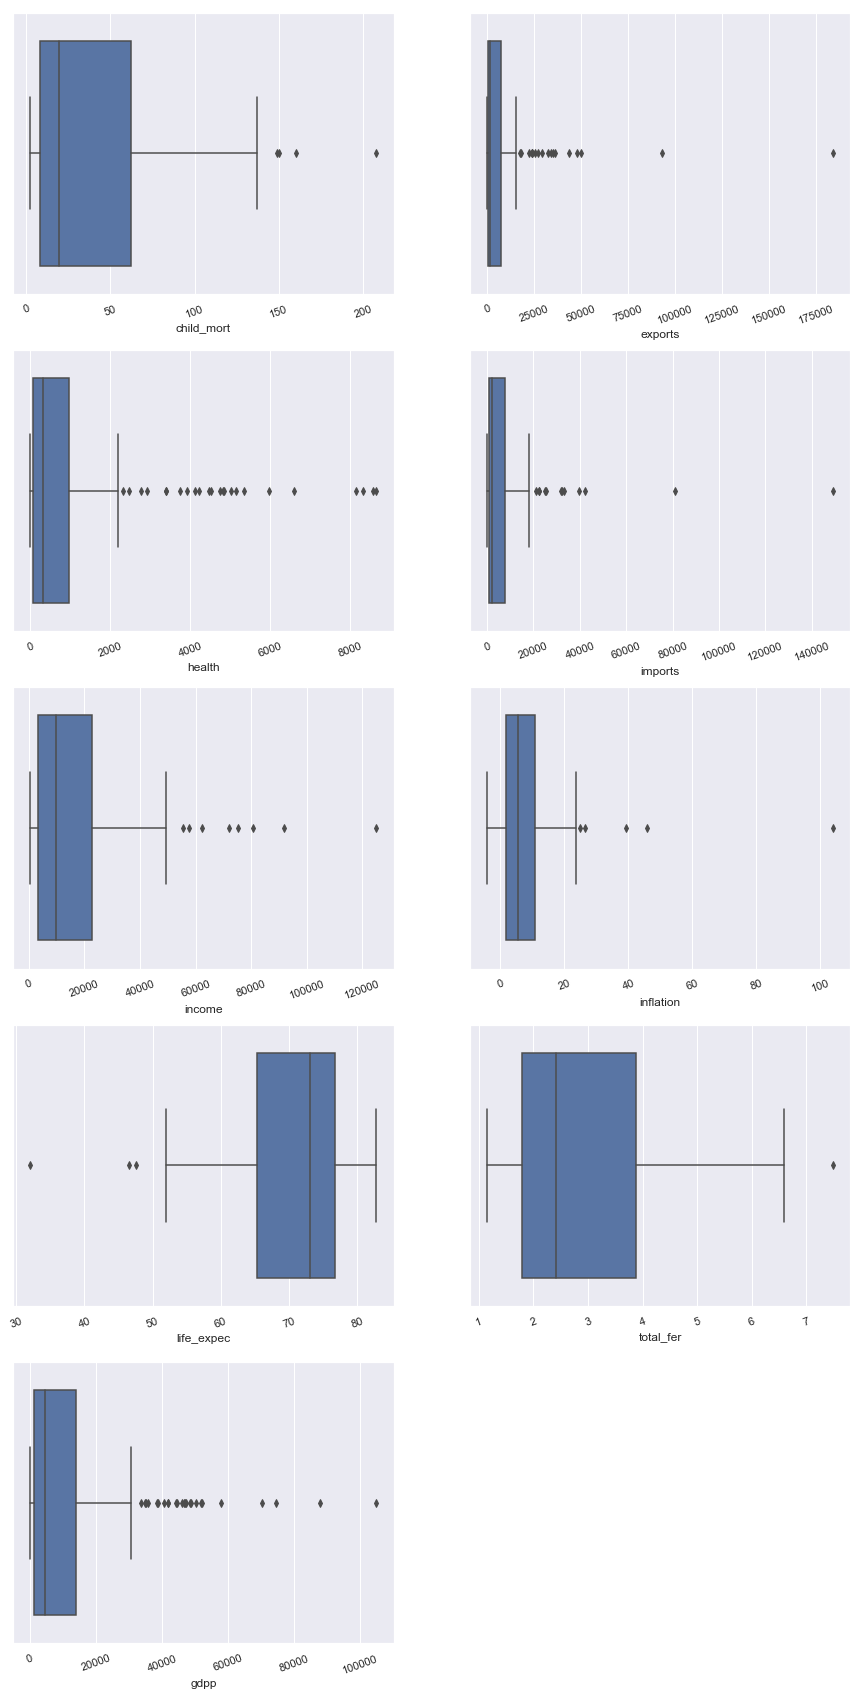

In [21]:
plt.figure(figsize=(15,30))
features = countries.columns
for i in enumerate(features): 
    ax = plt.subplot(5, 2, i[0]+1)
    sns.boxplot(x=i[1], data=countries)
    plt.xticks(rotation = 20)

 As we can see most of the features have outliers except total_fer and life_expec. But because **we are trying to find the countries which are in most need for aid ie we are sort of targeting the extremes. So we will keep our boundries soft for outlier treatment in order to not drop the countries that are needy**


 ### Outlier treatment

In [22]:
# Outlier treatment by capping the outliers 
# Keeping the boundries soft so that we dont endup dropping the required countries

Q1 = countries['child_mort'].quantile(0.01)
Q4 = countries['child_mort'].quantile(0.99)
countries['child_mort'] [countries['child_mort']  <= Q1]=Q1
countries['child_mort'] [countries['child_mort']  >= Q4]=Q4

Q1 = countries['exports'].quantile(0.01)
Q4 = countries['exports'].quantile(0.99)
countries['exports'] [countries['exports']  <= Q1]=Q1
countries['exports'] [countries['exports']  >= Q4]=Q4

Q1 = country['imports'].quantile(0.01)
Q4 = country['imports'].quantile(0.99)
countries['imports'] [countries['imports']  <= Q1]=Q1
countries['imports'] [countries['imports']  >= Q4]=Q4

Q1 = countries['gdpp'].quantile(0.01)
Q4 = countries['gdpp'].quantile(0.99)
countries['gdpp'] [countries['gdpp']  <= Q1]=Q1
countries['gdpp'] [countries['gdpp']  >= Q4]=Q4

Q1 = countries['inflation'].quantile(0.01)
Q4 = countries['inflation'].quantile(0.99)
countries['inflation'] [countries['inflation']  <= Q1]=Q1
countries['inflation'] [countries['inflation']  >= Q4]=Q4

Q1 = countries['health'].quantile(0.01)
Q4 = countries['health'].quantile(0.99)
countries['health'] [countries['health']  <= Q1]=Q1
countries['health'] [countries['health']  >= Q4]=Q4

Q1 =  countries['income'].quantile(0.01)
Q4 = countries['income'].quantile(0.99)
countries['income'] [countries['income']  <= Q1]=Q1
countries['income'] [countries['income']  >= Q4]=Q4

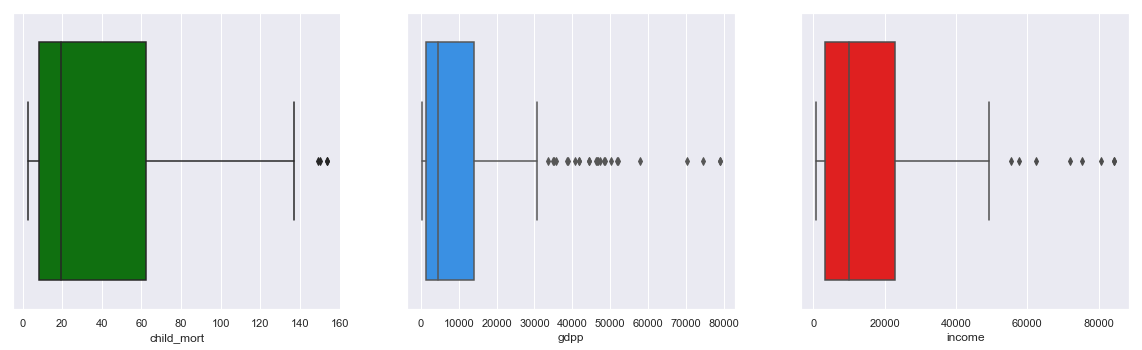

In [23]:
 # Plot after Outlier removal
plt.figure(figsize=(20, 12))

plt.subplot(2,3,1)
sns.boxplot(x = countries['child_mort'], palette=['green'])

plt.subplot(2,3,2)
sns.boxplot(x= countries['gdpp'], palette=['dodgerblue'])

plt.subplot(2,3,3)
sns.boxplot(x = countries['income'],palette=['red'])



## Step 5 : Hopkins Statistics Test

The `Hopkins statistic` (introduced by Brian Hopkins and John Gordon Skellam) is a way of `measuring the cluster tendency` of a data set.It acts as a statistical hypothesis test where the null hypothesis is that the data is generated by a Poisson point process and are thus uniformly randomly distributed. A value close to `1` tends to indicate the data is `highly clustered`, `random data` will tend to result in values around `0.5`, and uniformly distributed data will tend to result in values close to `0`.

In [24]:
# Calculating Hopkins score to know whether the data is good for clustering or not.

def hopkins(X):
    d = X.shape[1]
    n = len(X)
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    HS = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(HS):
        print(ujd, wjd)
        HS = 0
 
    return HS

In [25]:
# Hopkins score
hopkins(countries)

0.957670037063786

#### Inference:
0.94 is a good Hopkins score for Clustering.

## Step 6 : Rescaling the Features

we will use Standardisation Scaling.

In [26]:
# Standarisation technique for scaling
scaler = StandardScaler()
country_scaled = scaler.fit_transform(countries)
country_scaled

array([[ 1.34401227, -0.56963804, -0.56698288, ..., -1.61909203,
         1.90288227, -0.70231404],
       [-0.54754345, -0.47387318, -0.44041711, ...,  0.64786643,
        -0.85997281, -0.49877488],
       [-0.27254826, -0.42401465, -0.48629503, ...,  0.67042323,
        -0.0384044 , -0.47748297],
       ...,
       [-0.3753502 , -0.49162206, -0.54027452, ...,  0.28695762,
        -0.66120626, -0.65875194],
       [ 0.47276581, -0.53996578, -0.55245405, ..., -0.34463279,
         1.14094382, -0.65875194],
       [ 1.16153882, -0.52703195, -0.54229642, ..., -2.09278484,
         1.6246091 , -0.65012008]])

<a id="7"></a> <br>
## Step 7 : Model Building

As e are dealing with **Unsupervised Learning problem where we dont have predefined labels** . We will be utlilizing 
Unsupervised machine learning algorithms -
* K-means clustering 
* Hierarchial clustering

### K- means Clustering

**Finding the Optimal Number of Clusters**

#### Elbow Curve to get the right number of Clusters
A fundamental step for any unsupervised algorithm is to determine the optimal number of clusters into which the data may be clustered. The Elbow Method is one of the most popular methods to determine this optimal value of k.

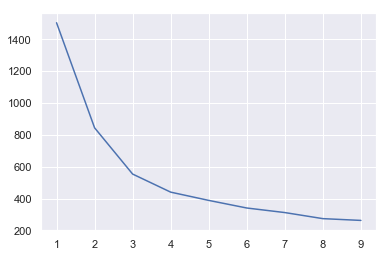

In [27]:
# Elbow curve method to find the ideal number of clusters.
#Now let's proceed to the elbow curve method
ssd = []
for k in list(range(1,10)):
    model = KMeans(n_clusters = k, max_iter = 50).fit(country_scaled)
    ssd.append([k, model.inertia_])
    
plt.plot(pd.DataFrame(ssd)[0], pd.DataFrame(ssd)[1]);

#### Inference:
Looking at the above elbow curve it looks good to proceed 3 or 4 clusters.

#### Silhouette Analysis to confirm no of clusters 

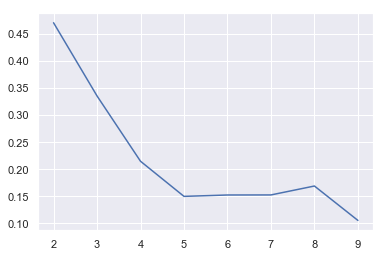

In [28]:
# Silhouette score analysis to find the ideal number of clusters for K-means clustering

from sklearn.metrics import silhouette_score
ss = []
for k in range(2,10):
    kmeans = KMeans(n_clusters = k).fit(countries)
    ss.append([k, silhouette_score(country_scaled, kmeans.labels_)])
    
plt.plot(pd.DataFrame(ss)[0], pd.DataFrame(ss)[1]);

#### Inference:
Looking at the above elbow curve and Silhouette metrics ,it looks good to proceed  3 clusters.

In [29]:
#K-means with k=3 clusters

kmean = KMeans(n_clusters = 3, max_iter = 50, random_state = 50)
kmean.fit(country_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=50, tol=0.0001, verbose=0)

In [30]:
# Cluster labels
kmean.labels_

array([1, 2, 2, 1, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 1, 2, 2, 2, 1,
       2, 0, 2, 1, 1, 2, 1, 0, 2, 1, 1, 2, 2, 2, 1, 1, 1, 2, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 1, 1, 2, 2, 0, 0, 1, 1, 2, 0, 1, 2, 2, 2, 1, 1, 2,
       1, 2, 0, 2, 2, 2, 1, 0, 2, 0, 2, 0, 2, 2, 1, 1, 0, 2, 1, 2, 2, 1,
       1, 2, 2, 0, 2, 1, 1, 2, 2, 1, 0, 1, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2,
       0, 0, 1, 1, 0, 2, 1, 2, 2, 2, 2, 2, 2, 0, 2, 2, 1, 2, 2, 1, 2, 2,
       1, 0, 2, 0, 1, 1, 2, 0, 2, 2, 1, 2, 0, 0, 2, 1, 2, 1, 1, 2, 2, 2,
       2, 1, 2, 0, 0, 0, 2, 2, 2, 2, 2, 1, 1])

In [31]:
# Assign the label
countries['cluster_id'] = kmean.labels_

In [32]:
# Number of countries in each cluster
countries['cluster_id'].value_counts()

2    90
1    48
0    29
Name: cluster_id, dtype: int64

In [33]:
#Checking the distribution of clusters

countries[countries['cluster_id']==0].shape
# cluster-0 has 29 countries

countries[countries['cluster_id']==1].shape
#cluster-1 has 48 countries

countries[countries['cluster_id']==2].shape
#cluster-2 has 90 countries

# It seems to be a good distribution

(90, 10)

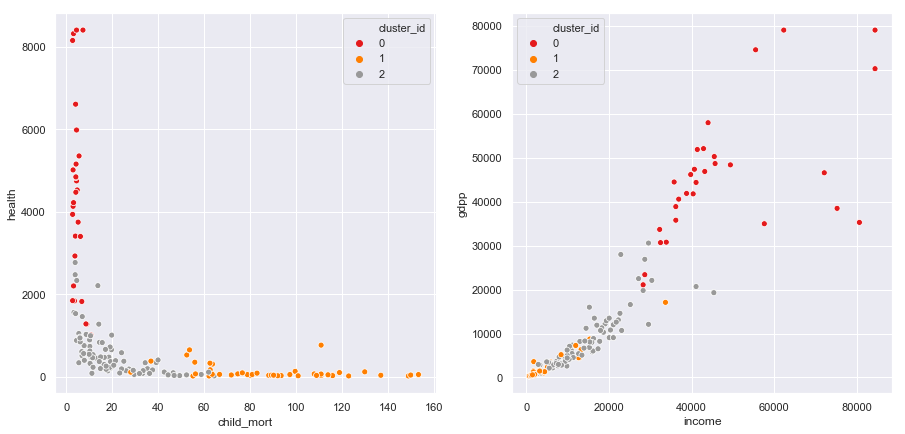

In [34]:
# Scatter plot on Principal components to visualize the spread of the data

fig, axes = plt.subplots(1,2, figsize=(15,7))

sns.scatterplot(x='child_mort',y='health',hue='cluster_id',legend='full',palette="Set1",data=countries,ax=axes[0])
sns.scatterplot(x='income',y='gdpp',hue='cluster_id',legend='full',palette="Set1",data=countries,ax=axes[1])

#### Inference:
- It seems to have divided countries in appropriate defining clusters

### Cluster Profiling

In [35]:
countries.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
0,90.2000,55.3000,41.9174,248.2970,1610.0000,9.4400,56.2000,5.8200,553.0000,1
1,16.6000,1145.2000,267.8950,1987.7400,9930.0000,4.4900,76.3000,1.6500,4090.0000,2
2,27.3000,1712.6400,185.9820,1400.4400,12900.0000,16.1000,76.5000,2.8900,4460.0000,2
3,119.0000,2199.1900,100.6050,1514.3700,5900.0000,22.4000,60.1000,6.1600,3530.0000,1
4,10.3000,5551.0000,735.6600,7185.8000,19100.0000,1.4400,76.8000,2.1300,12200.0000,2


In [36]:
countries.groupby('cluster_id').mean()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
cluster_id,,,,,,,,,
0,4.9897,25405.3593,4239.3300,21316.6959,47784.4138,2.9067,80.4793,1.7541,46068.1379
1,90.3354,879.0977,114.9390,827.3279,3901.0100,10.6086,59.2396,4.9921,1911.4008
2,20.5478,3477.2507,528.8943,3589.2920,13804.3333,7.1316,73.3933,2.2424,7808.5778


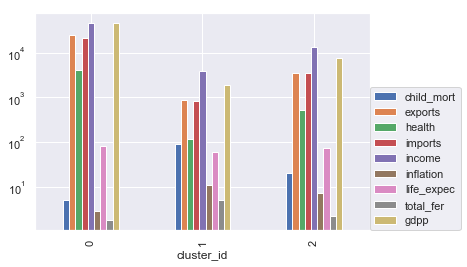

In [37]:
countries.groupby('cluster_id').mean().plot(kind = 'bar')
plt.yscale("log")
plt.legend(loc=(1,0))

    
   #### It seems Income, GDPP and child mortality are the cluster defining parameters.

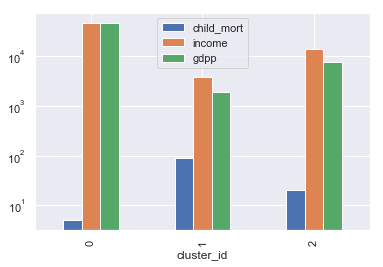

In [38]:
countries[['child_mort','income', 'gdpp','cluster_id']].groupby('cluster_id').mean().plot(kind = 'bar')
plt.yscale("log")


From the business understanding we have learnt that `Child_Mortality`, `Income`, `Gdpp` are some important factors which decides the development of any country.
Hence, we will proceed with analyzing these 3 components to build some meaningful clusters.

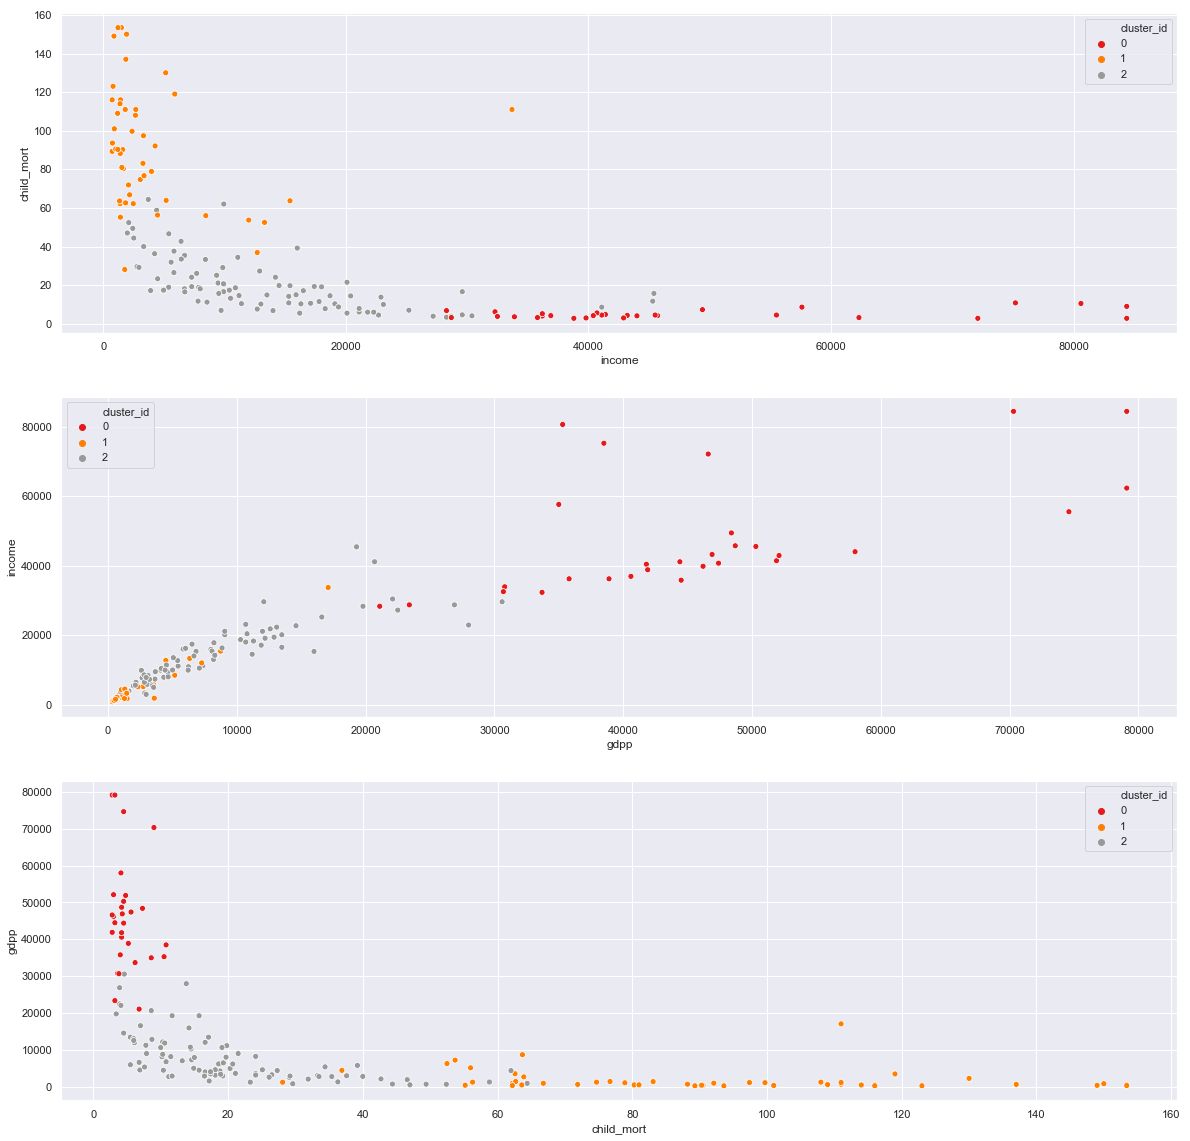

In [39]:
# Scatter plot on Original attributes to visualize the spread of the data
plt.figure(figsize=(20, 20))
plt.subplot(3,1,1)
sns.scatterplot(x = 'income', y = 'child_mort',hue='cluster_id',data = countries,legend='full',palette="Set1")
plt.subplot(3,1,2)
sns.scatterplot(x = 'gdpp', y = 'income',hue='cluster_id', data = countries,legend='full',palette="Set1")
plt.subplot(3,1,3)
sns.scatterplot(x = 'child_mort', y = 'gdpp',hue='cluster_id', data=countries,legend='full',palette="Set1")

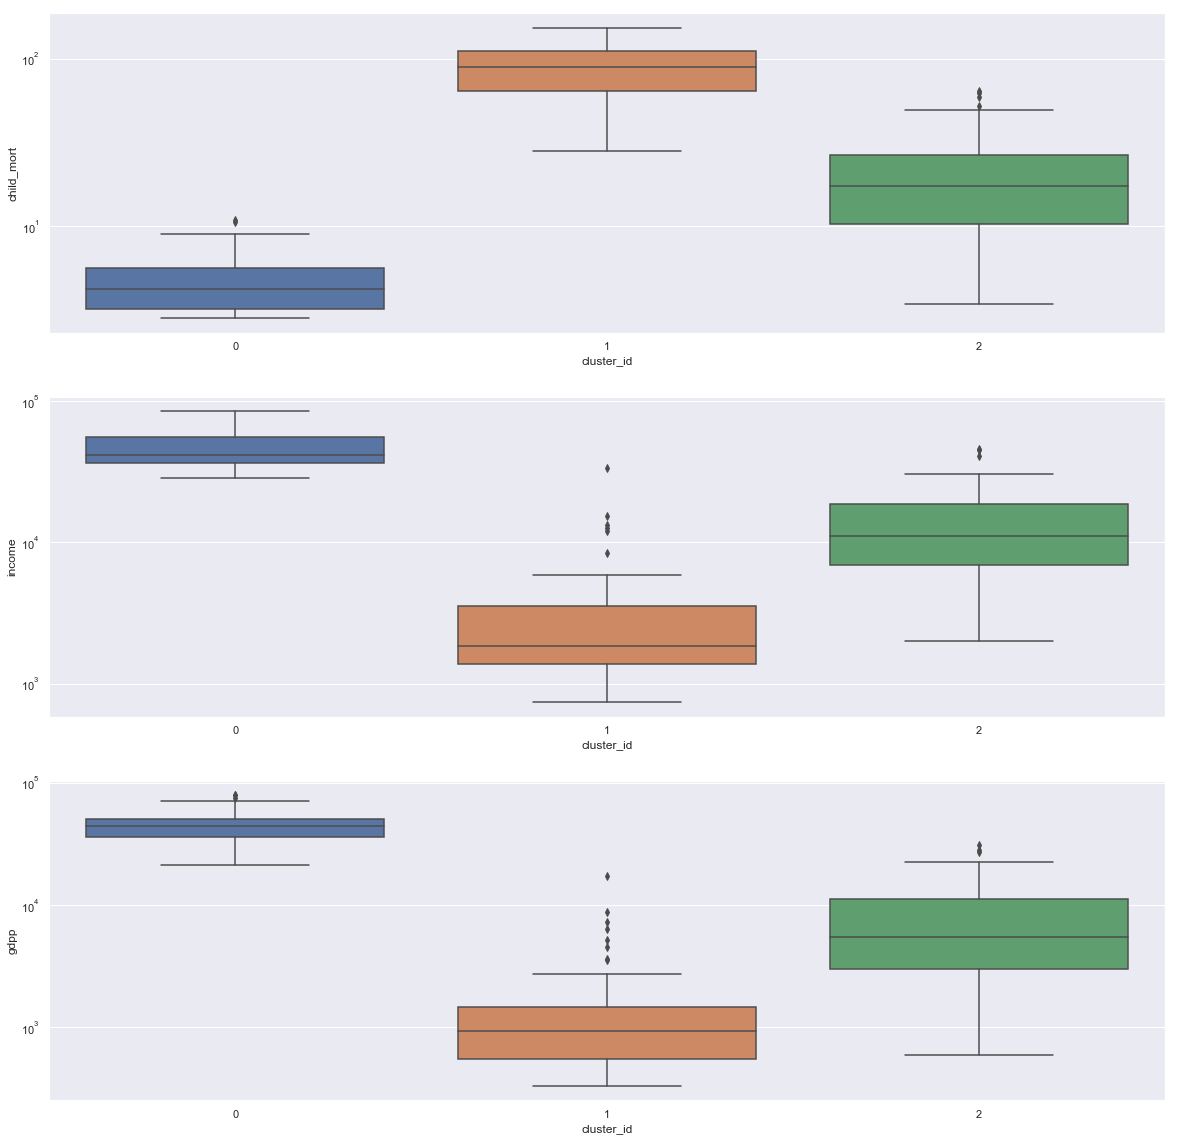

In [40]:
# Box plot on Original attributes to visualize the spread of the data

plt.figure(figsize=(20, 20))

plt.subplot(3,1,1)
plt.yscale("log")
sns.boxplot(x = 'cluster_id', y = 'child_mort', data = countries)

plt.subplot(3,1,2)
plt.yscale("log")
sns.boxplot(x = 'cluster_id', y = 'income', data = countries)

plt.subplot(3,1,3)
plt.yscale("log")
sns.boxplot(x = 'cluster_id', y = 'gdpp', data=countries)


#### Inference:

- Child Mortality is highest for Cluster 1.These clusters need some aid.

- Income and Gdpp are measures of development. Higher the per capita income and gdpp better is the country's development.
  Income per capita and gdpp seems lowest for countries in clusters 1. Hence, these countries need some help.
  
  **We will be going with Cluster-1**

In [41]:
countries['country'] = country['country']

In [42]:
# List of countries in Cluster 1

countries[countries['cluster_id']==1].sort_values(by=['gdpp','income','child_mort'],ascending=[True,True,False])


,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id,country
88,89.3000,62.4570,38.5860,302.8020,742.2400,5.4700,60.8000,5.0200,331.6200,1,Liberia
26,93.6000,22.2437,26.7960,104.9096,764.0000,12.3000,57.7000,6.2600,331.6200,1,Burundi
37,116.0000,137.2740,26.4194,165.6640,742.2400,20.8000,57.5000,6.5400,334.0000,1,"Congo, Dem. Rep."
112,123.0000,77.2560,17.9568,170.8680,814.0000,2.5500,58.8000,7.4900,348.0000,1,Niger
132,153.4000,67.0320,52.2690,137.6550,1220.0000,17.2000,55.0000,5.2000,399.0000,1,Sierra Leone
93,62.2000,103.2500,17.0094,177.5900,1390.0000,8.7900,60.8000,4.6000,413.0000,1,Madagascar
106,101.0000,131.9850,21.8299,193.5780,918.0000,7.6400,54.5000,5.5600,419.0000,1,Mozambique
31,149.0000,52.6280,17.7508,118.1900,888.0000,2.0100,47.5000,5.2100,446.0000,1,Central African Republic
94,90.5000,104.6520,30.2481,160.1910,1030.0000,12.1000,53.1000,5.3100,459.0000,1,Malawi
50,55.2000,23.0878,17.0094,112.3060,1420.0000,11.6000,61.7000,4.6100,482.0000,1,Eritrea


Now lets apply Hierarchial Clustering to see if we get any better clusters or not.

### Hierarchical Clustering

In [43]:
h_countries = country.copy()
h_countries.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.0000,167.0000,167.0000,167.0000,167.0000,167.0000,167.0000,167.0000,167.0000
mean,38.2701,7420.6188,1056.7332,6588.3521,17144.6886,7.7818,70.5557,2.9480,12964.1557
std,40.3289,17973.8858,1801.4089,14710.8104,19278.0677,10.5707,8.8932,1.5138,18328.7048
min,2.6000,1.0769,12.8212,0.6511,609.0000,-4.2100,32.1000,1.1500,231.0000
25%,8.2500,447.1400,78.5355,640.2150,3355.0000,1.8100,65.3000,1.7950,1330.0000
50%,19.3000,1777.4400,321.8860,2045.5800,9960.0000,5.3900,73.1000,2.4100,4660.0000
75%,62.1000,7278.0000,976.9400,7719.6000,22800.0000,10.7500,76.8000,3.8800,14050.0000
max,208.0000,183750.0000,8663.6000,149100.0000,125000.0000,104.0000,82.8000,7.4900,105000.0000


**Single Linkage:<br>**

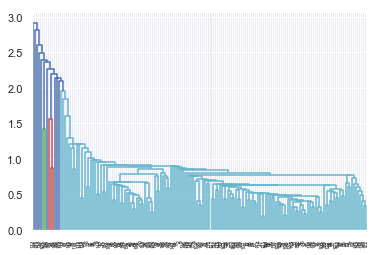

In [44]:
# Single linkage

mergings = linkage(country_scaled, method='single',metric='euclidean')
dendrogram(mergings)
plt.show()

**Complete Linkage<br>**


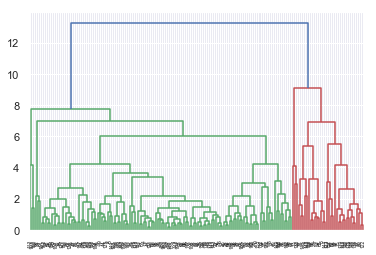

In [45]:
# Complete Linkage

mergings = linkage(country_scaled, method='complete',metric='euclidean')
dendrogram(mergings)
plt.show()

Complete Linkage seems to be more clear unless highly spare and complex in case of Single Linakge. So , we will go with complete linkage

In [46]:
# Let cut the tree at a height to get 4 clusters 
cluster_labels = cut_tree(mergings, n_clusters=4).reshape(-1, )
cluster_labels

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 2, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 3, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 3, 0, 0, 0])

In [47]:
h_countries['cluster_labels'] = cluster_labels
h_countries.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labels
0,Afghanistan,90.2000,55.3000,41.9174,248.2970,1610,9.4400,56.2000,5.8200,553,0
1,Albania,16.6000,1145.2000,267.8950,1987.7400,9930,4.4900,76.3000,1.6500,4090,0
2,Algeria,27.3000,1712.6400,185.9820,1400.4400,12900,16.1000,76.5000,2.8900,4460,0
3,Angola,119.0000,2199.1900,100.6050,1514.3700,5900,22.4000,60.1000,6.1600,3530,0
4,Antigua and Barbuda,10.3000,5551.0000,735.6600,7185.8000,19100,1.4400,76.8000,2.1300,12200,0


In [48]:
h_countries['cluster_labels'].value_counts()

0    128
1    33 
3    3  
2    3  
Name: cluster_labels, dtype: int64

In [49]:
#Checking the distribution of clusters

h_countries[h_countries['cluster_labels']==0].shape
# cluster-0 has 128 countries

h_countries[h_countries['cluster_labels']==1].shape
#cluster-1 has 33 countries

h_countries[h_countries['cluster_labels']==2].shape
#cluster-2 has 3 countries

h_countries[h_countries['cluster_labels']==3].shape
#cluster-3 has 3 countries



(3, 11)

### Cluster Profiling

In [50]:
h_countries.groupby('cluster_labels').mean()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
cluster_labels,,,,,,,,,
0,47.1305,2184.5180,295.6735,2217.1057,9435.9609,7.9854,67.9555,3.2700,4761.2031
1,5.3152,18995.1364,3734.0518,16359.7515,42924.2424,2.6660,79.9394,1.7567,40509.0909
2,3.2667,109037.0000,4826.4633,90769.8333,69833.3333,0.1180,81.4667,1.6100,66766.6667
3,57.7333,1891.5133,308.3803,1427.9900,9786.6667,63.0333,67.3667,3.6500,6160.0000


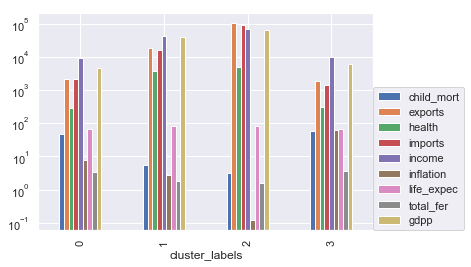

In [51]:
h_countries.groupby('cluster_labels').mean().plot(kind = 'bar')
plt.yscale("log")
plt.legend(loc=(1,0))

**Inference**:
    
It seems child_mortality , income and gdpp has significant role to play for clustering . Lets proceed with theses 3 features as part of analysis

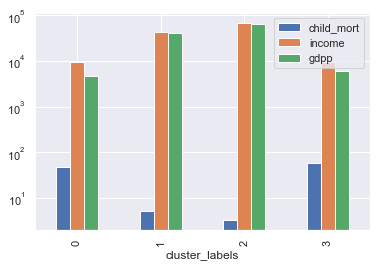

In [52]:
h_countries[['child_mort','income', 'gdpp','cluster_labels']].groupby('cluster_labels').mean().plot(kind = 'bar')
plt.yscale("log")


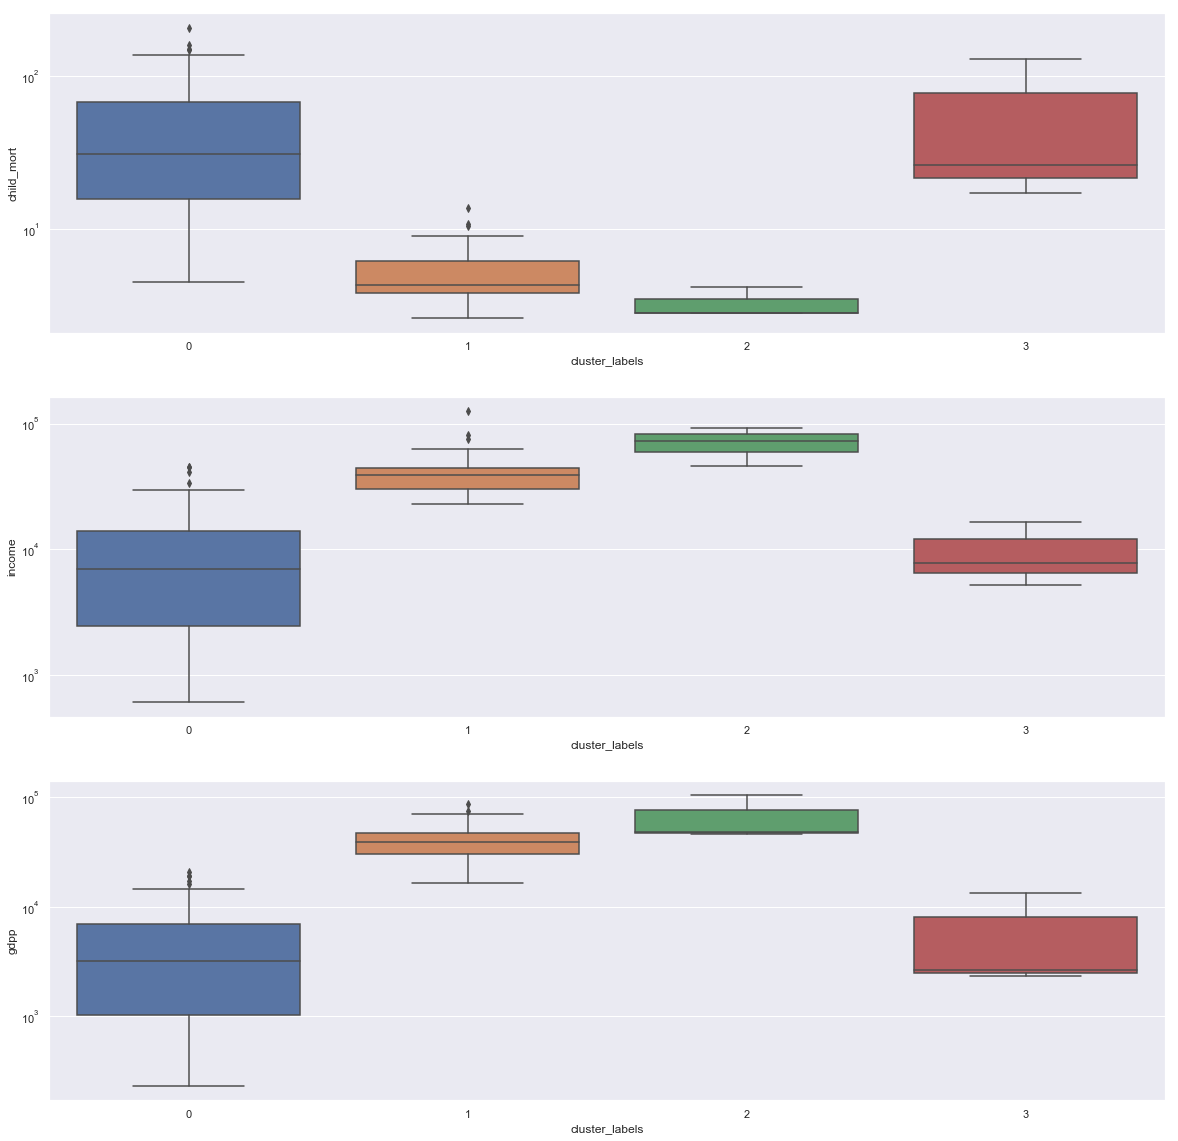

In [53]:
# Box plot on Original attributes to visualize the spread of the data

plt.figure(figsize=(20, 20))

plt.subplot(3,1,1)
plt.yscale("log")
sns.boxplot(x = 'cluster_labels', y = 'child_mort', data = h_countries)

plt.subplot(3,1,2)
plt.yscale("log")
sns.boxplot(x = 'cluster_labels', y = 'income', data = h_countries)

plt.subplot(3,1,3)
plt.yscale("log")
sns.boxplot(x = 'cluster_labels', y = 'gdpp', data=h_countries)


#### Inference:

- Child Mortality is high for Cluster 1 and 3.These clusters need some aid.
- Income per capita and gdpp seems lowest for countries in clusters 1 and 3. Hence, these countries need some help.

But we can choose cluster 0 to be our concerned cluster over cluster 3 as it has more agggrevated result. 

**Choosing to go with Cluster-0**


In [54]:
h_countries['country'] = country['country']

In [55]:
h_countries[h_countries['cluster_labels']==0].sort_values(by=['gdpp','income','child_mort'],ascending=[True,True,False])

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labels
26,Burundi,93.6000,20.6052,26.7960,90.5520,764,12.3000,57.7000,6.2600,231,0
88,Liberia,89.3000,62.4570,38.5860,302.8020,700,5.4700,60.8000,5.0200,327,0
37,"Congo, Dem. Rep.",116.0000,137.2740,26.4194,165.6640,609,20.8000,57.5000,6.5400,334,0
112,Niger,123.0000,77.2560,17.9568,170.8680,814,2.5500,58.8000,7.4900,348,0
132,Sierra Leone,160.0000,67.0320,52.2690,137.6550,1220,17.2000,55.0000,5.2000,399,0
93,Madagascar,62.2000,103.2500,15.5701,177.5900,1390,8.7900,60.8000,4.6000,413,0
106,Mozambique,101.0000,131.9850,21.8299,193.5780,918,7.6400,54.5000,5.5600,419,0
31,Central African Republic,149.0000,52.6280,17.7508,118.1900,888,2.0100,47.5000,5.2100,446,0
94,Malawi,90.5000,104.6520,30.2481,160.1910,1030,12.1000,53.1000,5.3100,459,0
50,Eritrea,55.2000,23.0878,12.8212,112.3060,1420,11.6000,61.7000,4.6100,482,0


**We have analyzed both K-means and Hierarchial clustering and found clusters formed have almost identical countries list.**

**We will proceed with the clusters formed by k-mean clustering** as distribution of countries seems better and based on the information provided by the final clusters we will deduce the final list of countries which are in need of aid.


## Step 8 : Final Analysis

In [57]:
# Based on final clusters information we are going to deduce the final list.

Final_list=countries[countries['cluster_id']==1]
Final_list.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
count,48.0000,48.0000,48.0000,48.0000,48.0000,48.0000,48.0000,48.0000,48.0000,48.0000
mean,90.3354,879.0977,114.9390,827.3279,3901.0100,10.6086,59.2396,4.9921,1911.4008,1.0000
std,30.8370,2252.4607,165.4463,1540.8373,5588.0225,8.5112,6.3849,1.0362,2924.6657,0.0000
min,28.1000,22.2437,17.0094,104.9096,742.2400,0.8850,32.1000,2.5900,331.6200,1.0000
25%,63.6750,102.8738,34.0059,193.3195,1390.0000,4.0800,56.7250,4.4750,551.5000,1.0000
50%,89.7500,196.2600,51.6135,339.3060,1860.0000,8.8550,59.8000,5.0550,932.0000,1.0000
75%,111.0000,552.5225,95.3033,801.0000,3522.5000,16.6000,62.8250,5.5975,1465.0000,1.0000
max,153.4000,14671.8000,766.0800,10071.9000,33700.0000,41.4780,71.1000,7.4900,17100.0000,1.0000


**As we can see our final dataframe contain 48 countries. From which we have to select the top 5 needy countries that need aid**

In [58]:
# We observed that mean child mortality is 90 for the selected clusters and hence 
# let's take all the countries with more than this child mortality .
df_final_list = Final_list[Final_list['child_mort']>90]
df_final_list.shape

(24, 11)

In [59]:
# Let's check the demographic of the resultant data again

df_final_list.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
count,24.0000,24.0000,24.0000,24.0000,24.0000,24.0000,24.0000,24.0000,24.0000,24.0000
mean,115.2333,899.3502,77.6991,773.4233,3350.2600,10.7593,56.4792,5.4196,1561.3592,1.0000
std,20.6434,2966.7683,149.6249,2009.2178,6610.8240,9.7362,6.9541,0.9832,3387.2263,0.0000
min,90.2000,22.2437,17.7508,104.9096,742.2400,0.8850,32.1000,3.3000,331.6200,1.0000
25%,99.1250,96.3402,29.3851,170.7010,1150.0000,3.8550,55.4500,5.0950,455.7500,1.0000
50%,111.0000,150.9120,39.6946,264.0660,1555.0000,7.2250,57.6000,5.3250,655.0000,1.0000
75%,124.7500,362.8170,55.8550,411.1435,2667.5000,16.3750,59.6500,5.9425,1177.5000,1.0000
max,153.4000,14671.8000,766.0800,10071.9000,33700.0000,41.4780,68.2000,7.4900,17100.0000,1.0000


In [60]:
# We observed that mean income is 3350 for the selected clusters and hence 
# let's take all the countries with less than this income .

df_final_list1 = df_final_list[df_final_list['income']<=3350]
df_final_list1.shape

(20, 11)

In [61]:
# Let's check the demographic of the resultant data again

df_final_list1.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
count,20.0000,20.0000,20.0000,20.0000,20.0000,20.0000,20.0000,20.0000,20.0000,20.0000
mean,115.6750,199.1762,42.8542,318.4355,1568.8120,7.9272,55.4350,5.4505,673.6310,1.0000
std,21.7790,176.6029,24.7079,255.1381,724.9812,6.2438,7.1223,0.9995,319.3075,0.0000
min,90.2000,22.2437,17.7508,104.9096,742.2400,0.8850,32.1000,3.3000,331.6200,1.0000
25%,99.1250,80.4412,29.3851,169.0660,1002.0000,2.8650,54.8750,5.0950,439.2500,1.0000
50%,111.0000,134.6295,38.0435,248.4025,1410.0000,5.9200,56.9000,5.3250,564.0000,1.0000
75%,126.5000,219.9630,47.9385,362.8237,1885.0000,12.1500,58.1750,5.9675,792.7500,1.0000
max,153.4000,617.3200,129.8700,1181.7000,3320.0000,20.8000,68.2000,7.4900,1310.0000,1.0000


In [67]:
# We observed that mean gdpp is 673 for the selected clusters and hence 
# let's take all the countries with less than this gdpp .

df_final_list2 = df_final_list1[df_final_list1['gdpp']<=673]
df_final_list2.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
count,13.0000,13.0000,13.0000,13.0000,13.0000,13.0000,13.0000,13.0000,13.0000,13.0000
mean,115.3385,102.6215,33.4969,203.8439,1131.2492,8.9654,54.0462,5.5269,477.6631,1.0000
std,23.6043,52.6158,11.2476,87.1860,294.4851,6.3560,7.2662,0.9745,112.8493,0.0000
min,90.2000,22.2437,17.7508,104.9096,742.2400,1.1800,32.1000,3.3300,331.6200,1.0000
25%,93.6000,67.0320,26.4194,160.1910,888.0000,2.9700,54.5000,5.2000,399.0000,1.0000
50%,114.0000,101.2860,31.9464,170.8680,1190.0000,7.6400,56.2000,5.3400,459.0000,1.0000
75%,123.0000,131.9850,41.9174,248.2970,1390.0000,12.3000,57.9000,5.8700,553.0000,1.0000
max,153.4000,196.3440,52.2690,428.3140,1610.0000,20.8000,58.8000,7.4900,662.0000,1.0000


#### Final List of countries which are in need of the aid based on socio-economic factors.

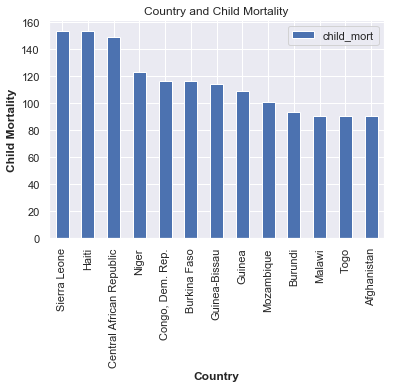

In [63]:
# BarPlot for Child Mortality of countries which are in need of aid

df_list_cm = pd.DataFrame(df_final_list2.groupby(['country'])['child_mort'].mean().sort_values(ascending = False))
df_list_cm.plot.bar()
plt.title('Country and Child Mortality')
plt.xlabel("Country",fontweight = 'bold')
plt.ylabel("Child Mortality", fontsize = 12, fontweight = 'bold')
plt.show()

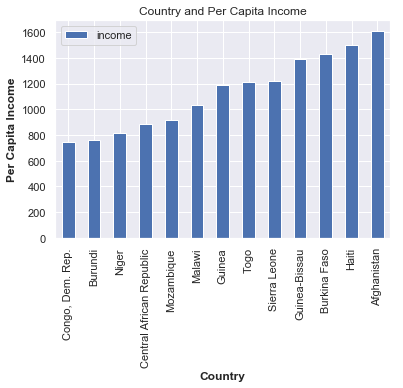

In [64]:
# BarPlot for Per Capita Income of countries which are in need of aid

df_list_in = pd.DataFrame(df_final_list2.groupby(['country'])['income'].mean().sort_values(ascending = True))
df_list_in.plot.bar()
plt.title('Country and Per Capita Income')
plt.xlabel("Country",fontweight = 'bold')
plt.ylabel("Per Capita Income", fontsize = 12, fontweight = 'bold')
plt.show()

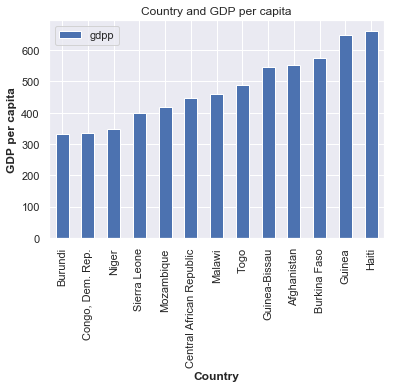

In [65]:
# BarPlot for Per Capita Income of countries which are in need of aid

df_list_gdp = pd.DataFrame(df_final_list2.groupby(['country'])['gdpp'].mean().sort_values(ascending = True))
df_list_gdp.plot.bar()
plt.title('Country and GDP per capita')
plt.xlabel("Country",fontweight = 'bold')
plt.ylabel("GDP per capita", fontsize = 12, fontweight = 'bold')
plt.show()

### Closing Statement

We have  identified few factors like child mortality, income and gdpp which plays a vital role in deciding the development status of the country and builded clusters of countries based on that.
Based on those clusters and deciding development factors , we have identified the below list of countries which are in dire need of aid-

* Burundi
* Sierra Leone
* Congo, Dem. Rep.
* Niger
* Central African Republic



